In [1]:
import numpy as np
import cvxpy as cp
from numpy import linalg as LA
from basis_generator import rand_moment
import matplotlib.pyplot as plt

In [2]:
def basis_gs(dim):
    
    num_obs = 3
    len_seq = 2
    num_out = 2
    remove_last_out = True

    #flag = False
    X_basis = []
    Norm = []

    X, _, __ = rand_moment(dim,
                    num_obs,
                    len_seq,
                    num_out,
                    [len_seq],
                    remove_last_out)

    X = X/LA.norm(X)
    X_basis.append(X)
    Norm.append(LA.norm(X))

    #while flag==False:
    for __ in range(80):

        X, _, __ = rand_moment(dim,
                    num_obs,
                    len_seq,
                    num_out,
                    [len_seq],
                    remove_last_out)

        for k in range(len(X_basis)):
            X -= X_basis[k]*np.sum(X_basis[k]*np.conjugate(X))
        
        Norm.append(LA.norm(X))
        if Norm[-1]/Norm[-2] < 1e-10:
            print("Nul matrix found")
            print("Number of LI moment matrices: ", len(X_basis))
            flag=True
        else:
            X = X/LA.norm(X)
            X_basis.append(X)

    return X_basis, Norm

In [3]:
dim = 2
X2, N2 = basis_gs(dim)

Nul matrix found
Number of LI moment matrices:  35


In [4]:
dim = 3
X3, N3 = basis_gs(dim)

Nul matrix found
Number of LI moment matrices:  46


In [5]:
dim = 4
X4, N4 = basis_gs(dim)

Nul matrix found
Number of LI moment matrices:  46


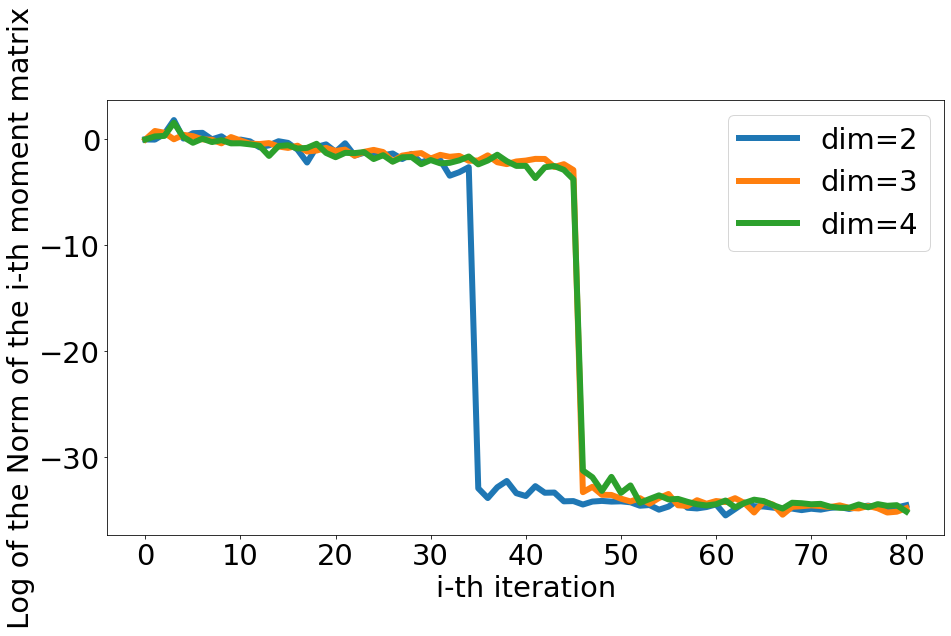

In [6]:
fig = plt.figure(figsize=(15, 8))

plt.plot(np.log(N2), linewidth = 6, zorder=1, label="dim=2")
plt.plot(np.log(N3), linewidth = 6, zorder=1, label="dim=3")
plt.plot(np.log(N4), linewidth = 6, zorder=1, label="dim=4")

plt.legend(fontsize=29)
plt.ylabel('Log of the Norm of the i-th moment matrix', fontsize=29)
plt.xlabel('i-th iteration', fontsize=29)
plt.tick_params(axis='both', labelsize=29)
plt.show()